In [176]:
import numpy as np

In [177]:
# Dictionary of all elements matched with their atomic masses.
elements_dict = {'H' : 1.008,'HE' : 4.003, 'LI' : 6.941, 'BE' : 9.012,\
                 'B' : 10.811, 'C' : 12.011, 'N' : 14.007, 'O' : 15.999,\
                 'F' : 18.998, 'NE' : 20.180, 'NA' : 22.990, 'MG' : 24.305,\
                 'AL' : 26.982, 'SI' : 28.086, 'P' : 30.974, 'S' : 32.066,\
                 'CL' : 35.453, 'AR' : 39.948, 'K' : 39.098, 'CA' : 40.078,\
                 'SC' : 44.956, 'TI' : 47.867, 'V' : 50.942, 'CR' : 51.996,\
                 'MN' : 54.938, 'FE' : 55.845, 'CO' : 58.933, 'NI' : 58.693,\
                 'CU' : 63.546, 'ZN' : 65.38, 'GA' : 69.723, 'GE' : 72.631,\
                 'AS' : 74.922, 'SE' : 78.971, 'BR' : 79.904, 'KR' : 84.798,\
                 'RB' : 84.468, 'SR' : 87.62, 'Y' : 88.906, 'ZR' : 91.224,\
                 'NB' : 92.906, 'MO' : 95.95, 'TC' : 98.907, 'RU' : 101.07,\
                 'RH' : 102.906, 'PD' : 106.42, 'AG' : 107.868, 'CD' : 112.414,\
                 'IN' : 114.818, 'SN' : 118.711, 'SB' : 121.760, 'TE' : 126.7,\
                 'I' : 126.904, 'XE' : 131.294, 'CS' : 132.905, 'BA' : 137.328,\
                 'LA' : 138.905, 'CE' : 140.116, 'PR' : 140.908, 'ND' : 144.243,\
                 'PM' : 144.913, 'SM' : 150.36, 'EU' : 151.964, 'GD' : 157.25,\
                 'TB' : 158.925, 'DY': 162.500, 'HO' : 164.930, 'ER' : 167.259,\
                 'TM' : 168.934, 'YB' : 173.055, 'LU' : 174.967, 'HF' : 178.49,\
                 'TA' : 180.948, 'W' : 183.84, 'RE' : 186.207, 'OS' : 190.23,\
                 'IR' : 192.217, 'PT' : 195.085, 'AU' : 196.967, 'HG' : 200.592,\
                 'TL' : 204.383, 'PB' : 207.2, 'BI' : 208.980, 'PO' : 208.982,\
                 'AT' : 209.987, 'RN' : 222.081, 'FR' : 223.020, 'RA' : 226.025,\
                 'AC' : 227.028, 'TH' : 232.038, 'PA' : 231.036, 'U' : 238.029,\
                 'NP' : 237, 'PU' : 244, 'AM' : 243, 'CM' : 247, 'BK' : 247,\
                 'CT' : 251, 'ES' : 252, 'FM' : 257, 'MD' : 258, 'NO' : 259,\
                 'LR' : 262, 'RF' : 261, 'DB' : 262, 'SG' : 266, 'BH' : 264,\
                 'HS' : 269, 'MT' : 268, 'DS' : 271, 'RG' : 272, 'CN' : 285,\
                 'NH' : 284, 'FL' : 289, 'MC' : 288, 'LV' : 292, 'TS' : 294,\
                 'OG' : 294}

In [178]:
#read in XDATCAR
def read_XDAT(filename):
    
    lattvec = []
    species, nats = [], []
    pos = []
    lc = []
    masses = []
    with open(filename) as file:
        for i, line in enumerate(file):
            if i in {2,3,4}:
                temp = [float(elem) for elem in line.split()]
                lattvec.append(temp)
                lc.append(sum(temp))
                
            elif i == 5:
                species = line.split()
                for elem in species:
                    masses.append(elements_dict[elem.upper()])
                
            elif i == 6:
                nats = [int(elem) for elem in line.split()]
                Ntot = sum(nats)
                break
        
        for i, line in enumerate(file):
            if i%(Ntot+1)==0:
                continue
            else:
                pos.append([float(elem) for elem in line.split()])

        nsw = int(len(pos)/Ntot)
        pos_arr = np.reshape(pos, (nsw,-1,3))
            
    return(lattvec, lc, species, nats, Ntot, nsw, pos_arr, masses)

def calc_vel(pos_arr, Ntot, lc):
    
    #calculate distances between r(t+1) and r(t-1)
    dr = np.array([pos_arr[i+1,:,:]-pos_arr[i-1,:,:] for i in range(1, nsw-1)])
    
    #periodic boundary conditions
    dr_flat = dr.flatten()
    dr_flat = np.where(dr_flat<-0.5, dr_flat+1., dr_flat)
    dr_flat = np.where(dr_flat>0.5, dr_flat-1., dr_flat)
    dr = np.reshape(dr_flat, (-1, Ntot, 3))
    
    #convert to cartesian
    dr = dr*lc 
    
    dt2 = 2*10 #get this from vasprun or INCAR or input!!
    vel = dr/dt2
    
    return(vel)

In [189]:
def mass_weight(vel, nats):
    
    for i in range(vel.shape[0]):
        for j in range(vel.shape[1]):
            print(j)
            if 
        break
        
    
    return vel.shape
    
    
    
    
lattvec, lc, species, nats, Ntot, nsw, pos_arr, masses = read_XDAT("test/XDATCAR")

vel = calc_vel(pos_arr, Ntot, lc)

vel_mass = mass_weight(vel, nats)

print(vel_mass)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
(486, 188, 3)


In [185]:
def calc_vacf(vel, nsw, Ntot):
    
    vacf = []
    delays = np.arange(1, vel.shape[0])
    
    for delay in delays:
        
        tend = int(nsw-2-delay)
        vacfOrigin = 0
        
        for origin in range(tend):
            vacfOrigin += np.sum(vel[origin, :, :]*vel[origin+delay, :, :])
                       
        vacf.append(vacfOrigin/(3*Ntot*tend))
    
    return delays, vacf

lattvec, lc, species, nats, Ntot, nsw, pos_arr, masses = read_XDAT("test/XDATCAR")

vel = calc_vel(pos_arr, Ntot, lc)

delays, vacf = calc_vacf(vel, nsw, Ntot)

AttributeError: 'list' object has no attribute 'shape'

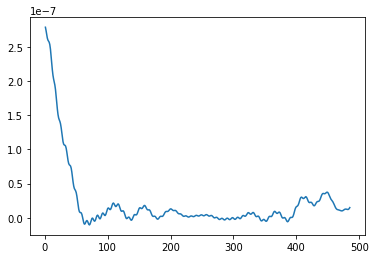

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(delays, vacf)
plt.show()